<div class="alert alert-block alert-info">
<b><big><big><big>Parquet Reader</b> <br>
Weight Signals

In [21]:
%reset -f

In [22]:
import os
import pandas as pd
import numpy as np
import pyarrow.parquet as pq 
import pickle
import random
import fastparquet
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from IPython.core.magic import register_cell_magic
@register_cell_magic
def skip(line, cell):   # cells can be skipped by using '%%skip' in the first line
    return

In [24]:
# ------------ LOCATE REPOSITORY/DATASTORAGE IN CURRENT SYSTEM ENVIRONMENT  --------------
import sys, os; from pathlib import Path                                                #|
global ROOT, DATA_PATH, IS_NOTEBOOK; IS_NOTEBOOK = True                                 #|
ROOT = Path('..', '..').resolve() if IS_NOTEBOOK else Path('.').resolve()               #|
sys.path.append(os.path.abspath(ROOT))                                                  #|
from data import get_data_path  # paths set in "data/__init__.py"                       #|
DATA_PATH = get_data_path()                                                             #|
print(f"{'-'*60}\n{DATA_PATH}:\t\t{', '.join([_.name for _ in DATA_PATH.glob('*/')])}") #|
print(f"{ROOT}:\t{', '.join([_.name for _ in ROOT.glob('*/')])}")   	                #|
# ----------------------------------------------------------------------------------------
# 
parquet_folder = Path(DATA_PATH, 'processed')
all_files = [os.fspath(_) for _ in parquet_folder.iterdir() if str(_).endswith(".parquet")]

------------------------------------------------------------
/home/sieglew/MA-Data:		processed_resampled, TripFiles, __pycache__, processed_2, y_true, processed, processed_new
/home/sieglew/MA-eR-PINN:	project, ref, test, data, src, .git, archive


In [25]:
%%skip
# import database statistics and complete list of files:
with open(volts_stats, 'rb') as handle:
    all_files, all_trips_soc, trips_sizes, trip_by_vehicle = pickle.load(handle) 

In [26]:
# randomly select 10 trip files:
sample = random.sample(all_files,10)

/home/sieglew/MA-Data/processed/v_id983V101_trip36.parquet
/home/sieglew/MA-Data/processed/v_id983V19_trip100_2.parquet
/home/sieglew/MA-Data/processed/v_id983V14_trip15.parquet
/home/sieglew/MA-Data/processed/v_id983V17_trip72.parquet
/home/sieglew/MA-Data/processed/v_id983V14_trip289.parquet
/home/sieglew/MA-Data/processed/v_id983V14_trip13_2.parquet
/home/sieglew/MA-Data/processed/v_id983V16_trip185.parquet
/home/sieglew/MA-Data/processed/v_id983V1_trip27.parquet
/home/sieglew/MA-Data/processed/v_id983V19_trip33.parquet
/home/sieglew/MA-Data/processed/v_id983V16_trip14.parquet


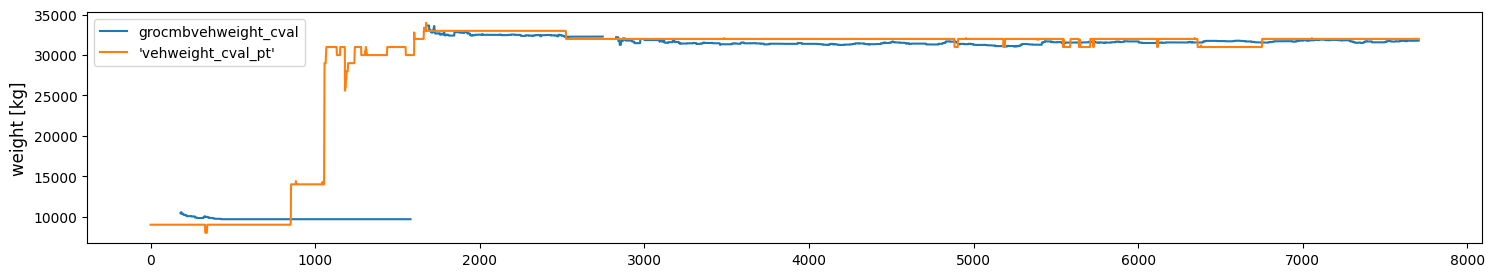

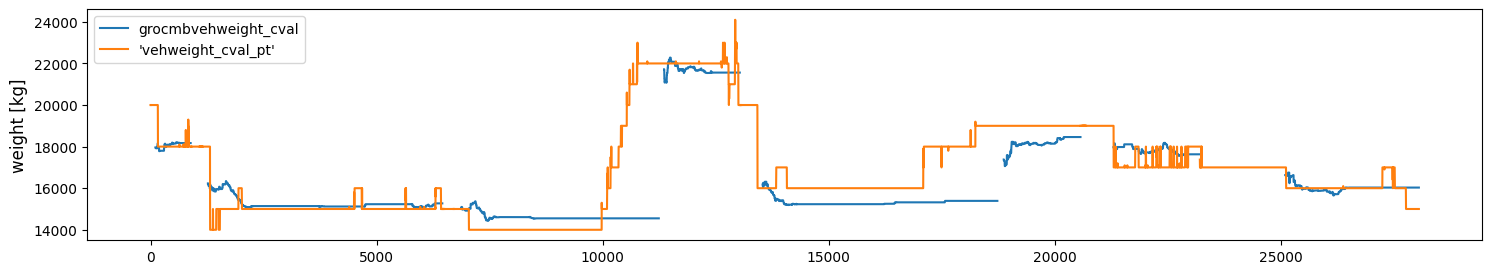

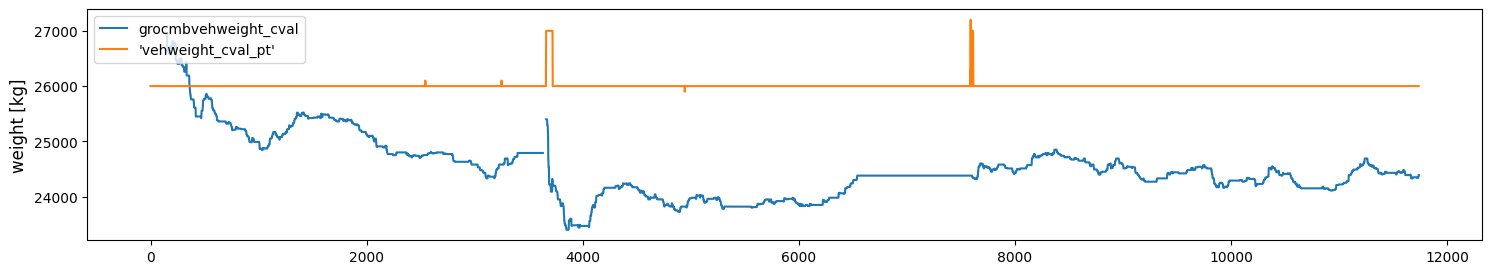

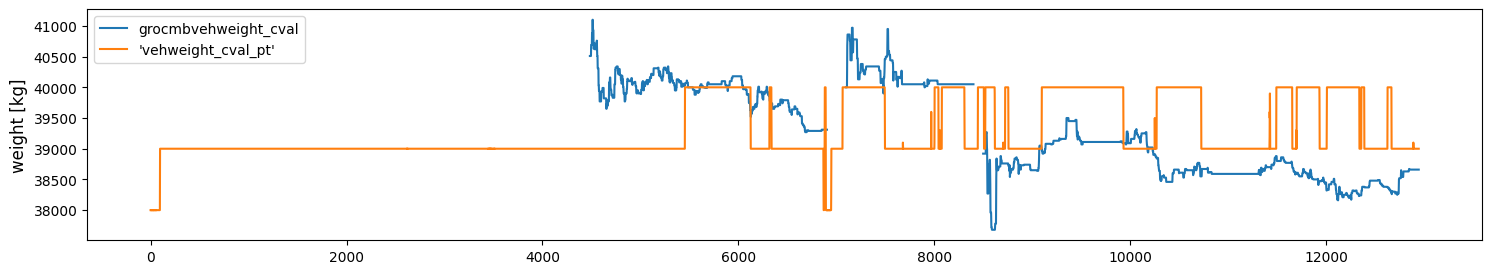

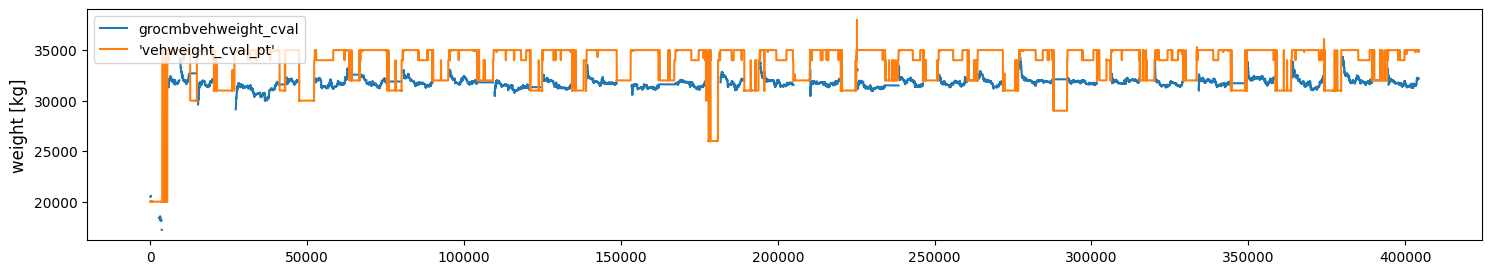

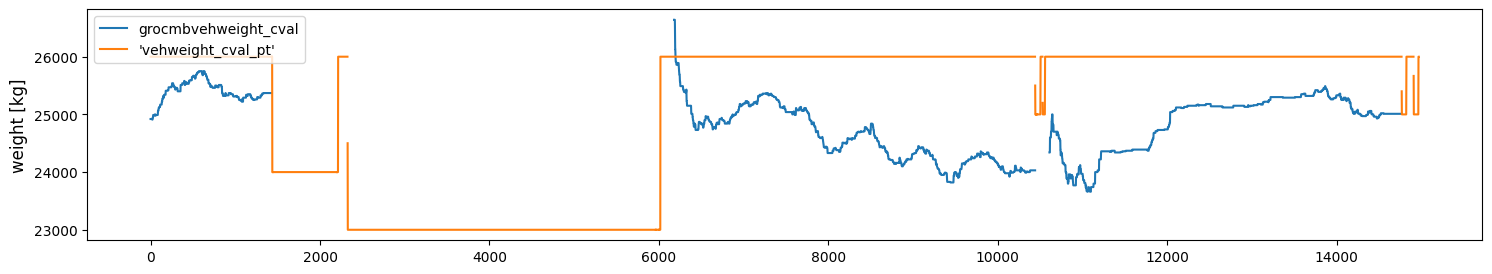

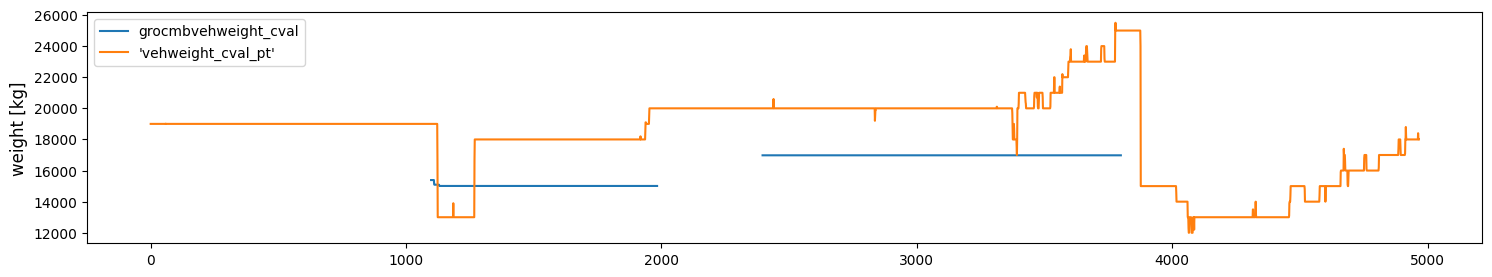

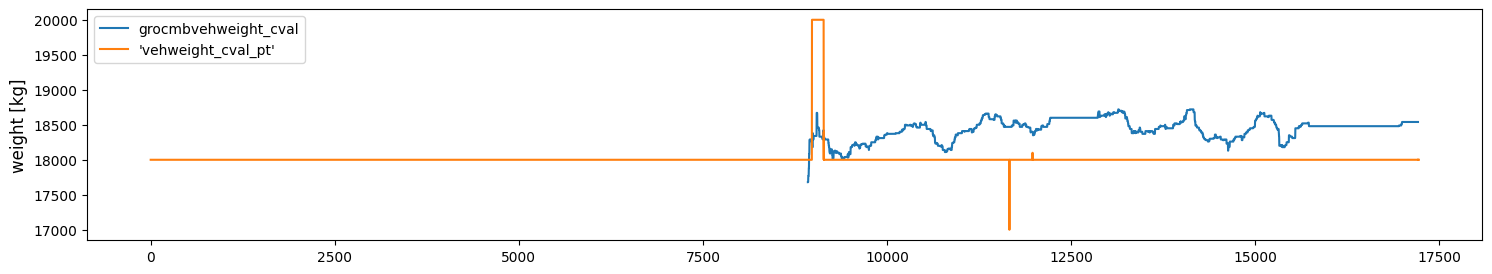

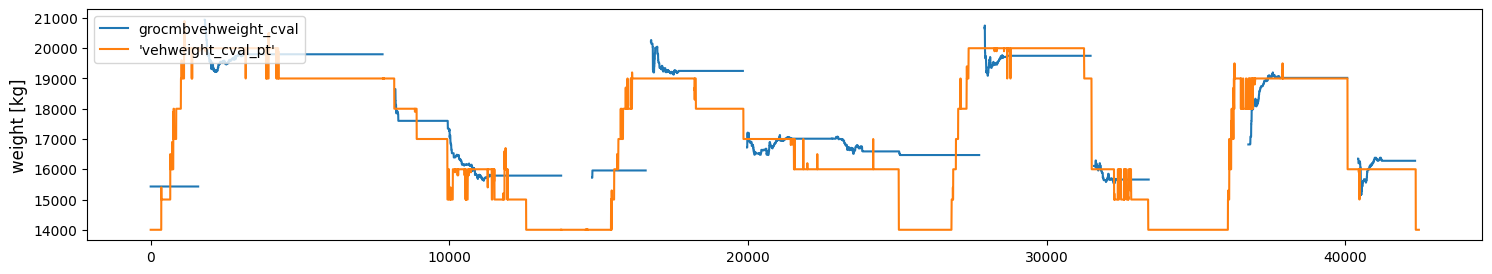

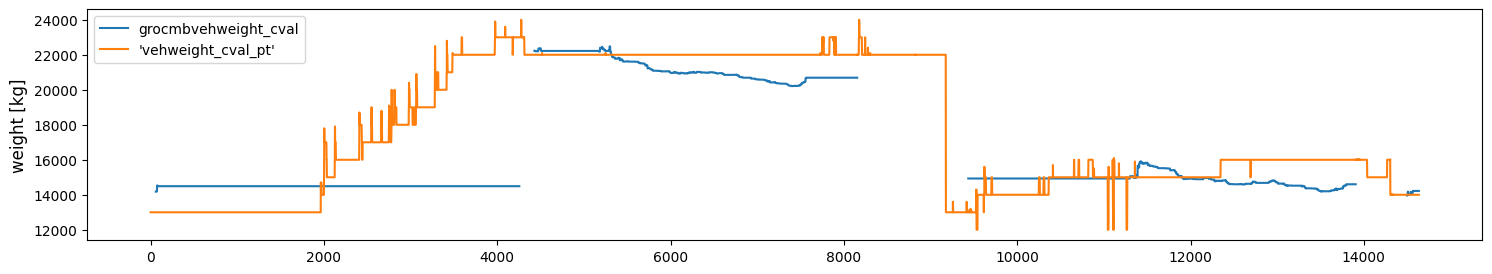

In [27]:
for f in sample:
    print(f)
    df = pd.read_parquet(f, engine='fastparquet', columns = ["vehweight_cval_pt", "grocmbvehweight_cval"] )

    fig , axs = plt.subplots(1, sharex=True,figsize=(18, 3)) #gridspec_kw={'hspace': 0}
    #plt.suptitle('Vehicle Weight Signals', fontsize='12')
    axs.set_ylabel('weight [kg]', fontsize='12')

    #m_grocmb = savgol_filter(pd.DataFrame(df.grocmbvehweight_cval).to_numpy()[:,0], 1000,1)
    m_grocmb = pd.DataFrame(df.grocmbvehweight_cval)
    axs.plot(m_grocmb, label="grocmbvehweight_cval")

    m_vehweight =  df.vehweight_cval_pt*1000
    axs.plot(m_vehweight, label="'vehweight_cval_pt'")

    axs.legend(loc="upper left")